In [2]:
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt


In [3]:
os.listdir()

['.ipynb_checkpoints', 'hw8.ipynb', 'titanicTrain.csv']

# ignore the columns with most null value  

In [4]:
tit = pd.read_csv('titanicTrain.csv')

In [5]:
tit = tit.dropna(axis=0, how='all')

In [6]:
columns = tit.columns

In [7]:
# ignore the columns with most null value
null_n = np.zeros(len(columns)).astype(np.int32)
for i,c in enumerate(columns):
    null_n[i] = tit[c].isnull().values.sum()
    print(c + ' : ' + str(null_n[i]))
drop_col = (null_n.argsort()[-4:][::-1])

pclass : 0
survived : 0
name : 0
sex : 0
age : 139
sibsp : 0
parch : 0
ticket : 0
fare : 0
cabin : 717
embarked : 2
boat : 583
body : 905
home.dest : 258


In [8]:
for dc in drop_col:
    tit = tit.drop(columns[dc], axis = 1)
tit

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,S
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,S
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,S
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,S
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,C


In [9]:
tit = tit.dropna(axis=0, how='any')

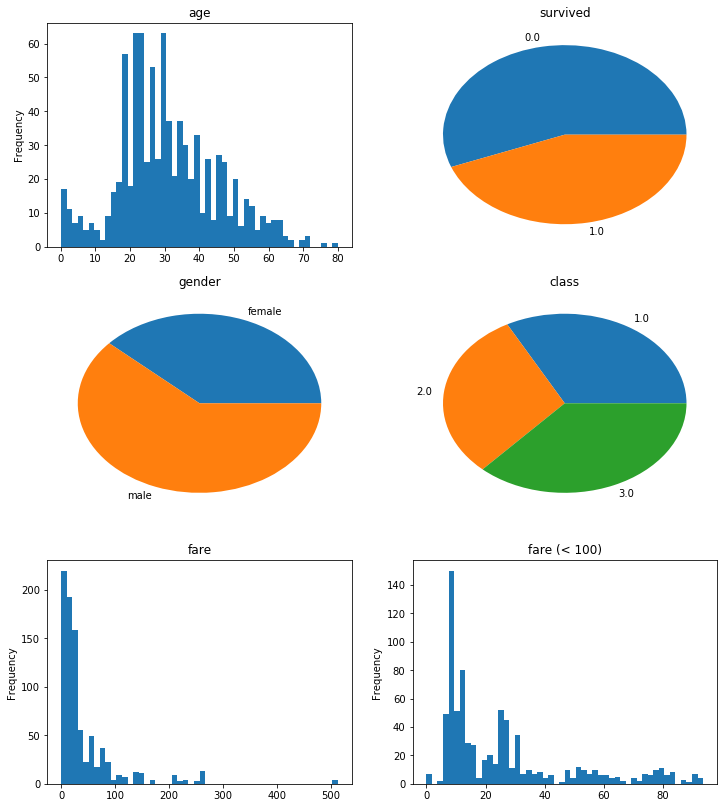

In [10]:
fig, axs = plt.subplots(3, 2, squeeze=False, figsize=(12, 14))
tit.age.plot.hist(bins=50, title='age', ax=axs[0, 0])
tit.groupby('survived').agg('count')['age'].plot.pie(title='survived', ax=axs[0, 1])
axs[0, 1].set_ylabel('')
tit.groupby('sex').agg('count')['age'].plot.pie(title='gender', ax=axs[1, 0])
axs[1, 0].set_ylabel('')
tit.groupby('pclass').agg('count')['age'].plot.pie(title='class', ax=axs[1, 1])
axs[1, 1].set_ylabel('')
fare = tit.fare
fare.plot.hist(bins=50, title='fare', ax=axs[2, 0])
fare[fare < 100].plot.hist(bins=50, title='fare (< 100)', ax=axs[2, 1])
plt.show()

In [11]:
tit['child'] = tit.apply(lambda row: 1 if row['age'] < 15 else 0, axis=1)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
sex_group = tit[['sex', 'survived']].groupby('sex')
sex_agg = sex_group.agg(['sum', 'count'])['survived']
print(sex_agg)
sex_agg['per'] = sex_agg['sum']/sex_agg['count']
print(sex_agg)

          sum  count
sex                 
female  264.0    329
male    115.0    530
          sum  count       per
sex                           
female  264.0    329  0.802432
male    115.0    530  0.216981


In [13]:
child_group = tit[['child', 'survived']].groupby('child')
child_agg = child_group.agg(['sum', 'count'])['survived']
print(child_agg)
child_agg['per'] = child_agg['sum']/child_agg['count']
print(child_agg)

         sum  count
child              
0      329.0    787
1       50.0     72
         sum  count       per
child                        
0      329.0    787  0.418043
1       50.0     72  0.694444


In [14]:
pclass_group = tit[['pclass', 'survived']].groupby('pclass')
pclass_agg = pclass_group.agg(['sum', 'count'])['survived']
print(pclass_agg)
pclass_agg['per'] = pclass_agg['sum']/pclass_agg['count']
print(pclass_agg)

          sum  count
pclass              
1.0     179.0    282
2.0     115.0    261
3.0      85.0    316
          sum  count       per
pclass                        
1.0     179.0    282  0.634752
2.0     115.0    261  0.440613
3.0      85.0    316  0.268987


In [15]:
parch_group = tit[['parch', 'survived']].groupby('parch')
parch_agg = parch_group.agg(['sum', 'count'])['survived']
print(parch_agg)
parch_agg['per'] = parch_agg['sum']/parch_agg['count']
print(parch_agg)

         sum  count
parch              
0.0    236.0    633
1.0     84.0    125
2.0     52.0     85
3.0      5.0      8
4.0      1.0      2
5.0      1.0      4
6.0      0.0      2
         sum  count       per
parch                        
0.0    236.0    633  0.372828
1.0     84.0    125  0.672000
2.0     52.0     85  0.611765
3.0      5.0      8  0.625000
4.0      1.0      2  0.500000
5.0      1.0      4  0.250000
6.0      0.0      2  0.000000


In [16]:
sibsp_group = tit[['sibsp', 'survived']].groupby('sibsp')
sibsp_agg = sibsp_group.agg(['sum', 'count'])['survived']
print(sibsp_agg)
sibsp_agg['per'] = sibsp_agg['sum']/sibsp_agg['count']
print(sibsp_agg)

         sum  count
sibsp              
0.0    219.0    552
1.0    135.0    248
2.0     16.0     34
3.0      6.0      7
4.0      3.0     12
5.0      0.0      6
         sum  count       per
sibsp                        
0.0    219.0    552  0.396739
1.0    135.0    248  0.544355
2.0     16.0     34  0.470588
3.0      6.0      7  0.857143
4.0      3.0     12  0.250000
5.0      0.0      6  0.000000


In [17]:
embarked_group = tit[['embarked', 'survived']].groupby('embarked')
embarked_agg = embarked_group.agg(['sum', 'count'])['survived']
print(embarked_agg)
embarked_agg['per'] = embarked_agg['sum']/embarked_agg['count']
print(embarked_agg)

            sum  count
embarked              
C         118.0    189
Q          11.0     41
S         250.0    629
            sum  count       per
embarked                        
C         118.0    189  0.624339
Q          11.0     41  0.268293
S         250.0    629  0.397456


### As we can see, [sex, pclass, parch, sibsp, age, child, embarked] is meaningful. 

In [18]:
def embark2n(e):
    if e == 'S':
        return 0
    elif e == 'C':
        return 1
    else:
        return 2

In [19]:
tit['sex_n'] = tit['sex'].apply(lambda x: 0 if x =='male' else 1)
tit['embarked_n'] = tit['embarked'].apply(embark2n)

tit.drop('sex', axis=1)
tit.drop('embarked', axis=1)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,child,sex_n,embarked_n
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,0,1,0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,1,0,0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,1,1,0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,0,0,0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,0,1,0
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,0,0,0
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,0,1,0
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,0,0,0
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,0,1,0
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,0,0,1


In [20]:
use_col = ['sex_n', 'pclass', 'parch', 'sibsp', 'age', 'child', 'embarked_n']

In [21]:
X = tit[use_col].as_matrix()
y = tit['survived'].as_matrix()

In [22]:
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn import preprocessing
preprocessed_X = preprocessing.normalize(preprocessing.scale(X))
print(preprocessed_X.shape)

(859, 7)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preprocessed_X, y, test_size=0.33, random_state=42)

In [24]:
my_pca = PCA(n_components=2)

#missing feature scaling and normalization
my_pca.fit(X_train)
train_X_PCA = my_pca.transform(X_train)
test_X_PCA = my_pca.transform(X_test)

### PCA

In [25]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(train_X_PCA, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [26]:
predict_y = clf.predict(test_X_PCA)
acc = (y_test == predict_y).mean()
print(acc)

0.757042253521


### normal

In [27]:
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train)
predict_y = clf.predict(X_test)
acc = (y_test == predict_y).mean()
print(acc)

0.785211267606


# Try all

In [28]:
tit = pd.read_csv('titanicTrain.csv')

In [29]:
tit = tit.dropna(axis=0, how='all')
print( 'total row : ', len(tit))

total row :  1000


In [30]:
columns = tit.columns
# ignore the columns with most null value
null_n = np.zeros(len(columns)).astype(np.int32)
for i,c in enumerate(columns):
    null_n[i] = tit[c].isnull().values.sum()
    print(c + ' : ' + str(null_n[i]))
drop_col = (null_n.argsort()[-4:][::-1])

pclass : 0
survived : 0
name : 0
sex : 0
age : 139
sibsp : 0
parch : 0
ticket : 0
fare : 0
cabin : 717
embarked : 2
boat : 583
body : 905
home.dest : 258


In [31]:
tit_suv = tit[tit['survived']==1.0]
tit_dead = tit[tit['survived']==0.0]

print("suv : ", len(tit_suv))
print("dead : ", len(tit_dead))

suv :  423
dead :  577


### find that body only have 95 data, so ignore body.
### Also, ignore name.

In [32]:
tit = tit.drop(['body', 'name'], axis=1)
columns = tit.columns

In [33]:
tit

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,"New York, NY"
6,1.0,1.0,female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,"Hudson, NY"
7,1.0,0.0,male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,"Belfast, NI"
8,1.0,1.0,female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,"Bayside, Queens, NY"
9,1.0,0.0,male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,"Montevideo, Uruguay"


In [34]:
import math
def home2sim(x):
    x = str(x)
    if(x == 'nan'):
        return ''
    x = x.split(',')
    return x[-1]

tit['home'] = tit['home.dest'].apply(home2sim)
tit

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,home
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,"St Louis, MO",MO
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",ON
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",ON
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",ON
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",ON
5,1.0,1.0,male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,"New York, NY",NY
6,1.0,1.0,female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,"Hudson, NY",NY
7,1.0,0.0,male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,"Belfast, NI",NI
8,1.0,1.0,female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,"Bayside, Queens, NY",NY
9,1.0,0.0,male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,"Montevideo, Uruguay",Uruguay


In [35]:


def plot_kde(title, feature, xmin=0, xmax=None):
    fig, ax = plt.subplots(1,1)
    tit_suv[feature].plot.kde(ax=ax, color='g')
    tit_dead[feature].plot.kde(ax=ax, color='r')
    ax.set_title(title)
    ax.set_xlim(xmin, xmax)
    plt.show()

### figure out whether age, fare are useful

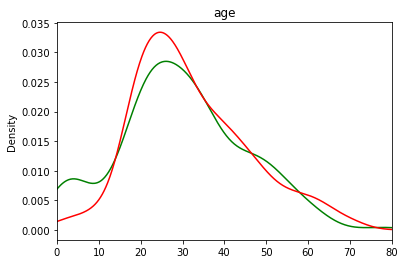

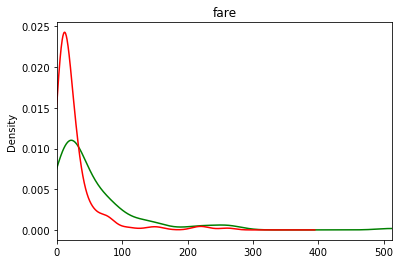

In [36]:
tit_suv = tit[tit['survived']==1.0]
tit_dead = tit[tit['survived']==0.0]

plot_kde('age', 'age', xmax=tit.age.max())
plot_kde('fare', 'fare', xmax=tit.fare.max())


In [37]:
def pie_plot(labels, sizes, title):
    plt.figure(figsize=(6,9)) 
    patches,text1,text2 = plt.pie(sizes,
                          labels=labels,
                          autopct = '%3.2f%%',
                          shadow = False, 
                          startangle =90, 
                          pctdistance = 0.6) 

    plt.axis('equal')
    plt.title(title)
    plt.show()

## As we can see, people who pay high fare have a high probablity to survive.

## boat

Index(['4', '15', '14', '10', '5', '13', '3', '7', '8', '11', '9', '6', 'C',
       '12', 'D', '2', '16', 'A', 'B', '1', '5 7', 'C D', '8 10', '5 9',
       '13 15 B', '15 16'],
      dtype='object')
Index(['4', '15', '14', '10', '5', '13', '3', '7', '8', '11', '9', '6', 'C',
       '12', 'D', '2', '16', 'A', 'B', '1'],
      dtype='object')


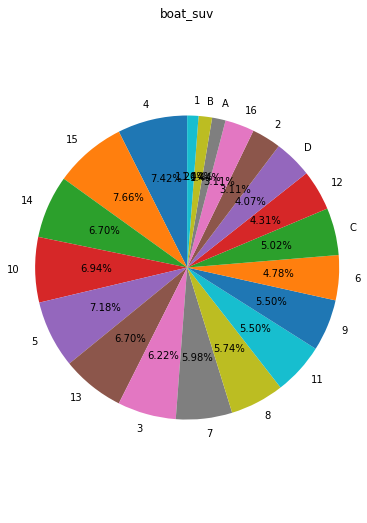

In [38]:
boat_suv_count = tit_suv['boat'].value_counts()
boat_suv_index = boat_suv_count.index
print(boat_suv_count.index)

# 處理坐超過一隻船的資料
for i in boat_suv_index:
    split_i = i.split(' ')

    if len(split_i)>1:
        for si in split_i:
            boat_suv_count[si] += boat_suv_count[i]
        boat_suv_count = boat_suv_count.drop([i])

boat_suv_index = boat_suv_count.index
print(boat_suv_count.index)
pie_plot(boat_suv_index, boat_suv_count, 'boat_suv')


Index(['A', 'D', 'B', '12', '14'], dtype='object')
Index(['A', 'D', 'B', '12', '14'], dtype='object')


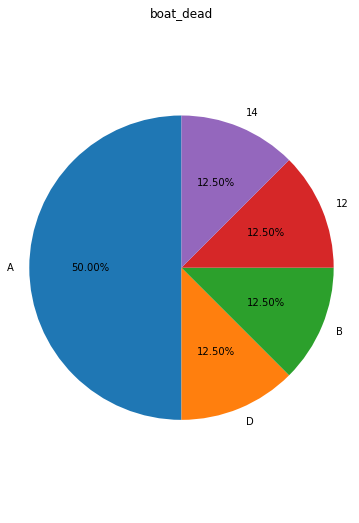

In [39]:
boat_dead_count = tit_dead['boat'].value_counts()
boat_dead_index = boat_dead_count.index
print(boat_dead_count.index)

# 處理坐超過一隻船的資料
for i in boat_dead_index:
    split_i = i.split(' ')

    if len(split_i)>1:
        for si in split_i:
            boat_dead_count[si] += boat_dead_count[i]
        boat_dead_count = boat_dead_count.drop([i])

boat_dead_index = boat_dead_count.index
print(boat_dead_count.index)
pie_plot(boat_dead_index, boat_dead_count, 'boat_dead')


suvival rate:


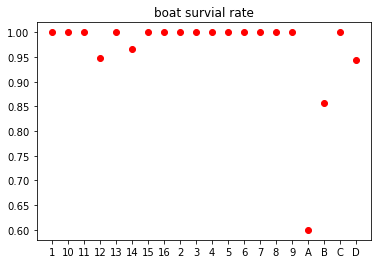

In [40]:
bdi = boat_dead_index
for bsi in (boat_suv_index):
    if not bsi in bdi:
        boat_dead_count[bsi] = 0

print('suvival rate:')
boat_suv_rate = boat_suv_count / (boat_dead_count + boat_suv_count)
x = np.arange(len(boat_suv_rate.index))
plt.xticks(x, boat_suv_rate.index)
plt.plot(x, boat_suv_rate, 'ro')
plt.title('boat survial rate')
plt.show()

## This figure out that if someone who is on boat, he/she would have a high prosibility to suvive. Also, boat A is the exception.

In [41]:
# if nan, we suppose he/she would have 50 percent to survive. 
def boat2num(x):
    if(str(x) != 'nan' and str(x)!='NaN'):
        x = x.split(' ')
        avg = []
        for c in x:
            avg.append(boat_suv_rate[c])
        return np.array(avg).mean()
    
    return 0.4

In [42]:
tit['boat_num'] = tit['boat'].apply(boat2num)

In [43]:
tit

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,home,boat_num
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,"St Louis, MO",MO,1.000000
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",ON,1.000000
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",ON,0.400000
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",ON,0.400000
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",ON,0.400000
5,1.0,1.0,male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,"New York, NY",NY,1.000000
6,1.0,1.0,female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,"Hudson, NY",NY,1.000000
7,1.0,0.0,male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,"Belfast, NI",NI,0.400000
8,1.0,1.0,female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,"Bayside, Queens, NY",NY,0.944444
9,1.0,0.0,male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,"Montevideo, Uruguay",Uruguay,0.400000



## Check home

Index(['4', '15', '14', '10', '5', '13', '3', '7', '8', '11', '9', '6', 'C',
       '12', 'D', '2', '16', 'A', 'B', '1'],
      dtype='object')


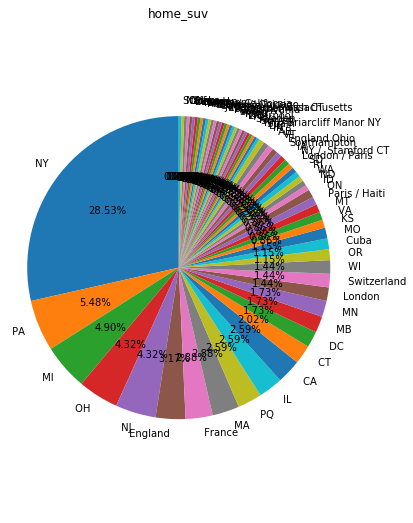

In [44]:
home_suv_count = tit_suv['home'].value_counts()
home_suv_count = home_suv_count.drop([''])
home_suv_index = home_suv_count.index
print(boat_suv_count.index)

pie_plot(home_suv_index, home_suv_count, 'home_suv')


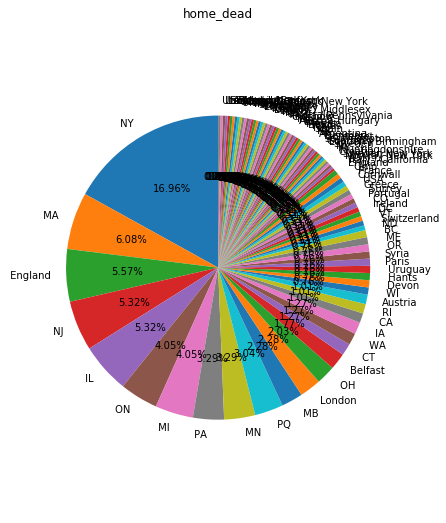

In [45]:
home_dead_count = tit_dead['home'].value_counts()
home_dead_count = home_dead_count.drop([''])
home_dead_index = home_dead_count.index

pie_plot(home_dead_index, home_dead_count, 'home_dead')


suvival rate:


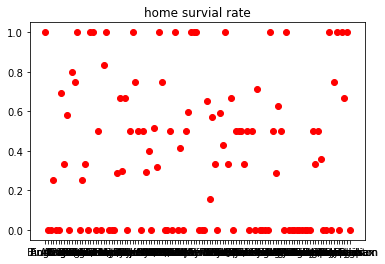

In [46]:
for hsi in (home_suv_index):
    if not hsi in home_dead_index:
        home_dead_count[hsi] = 0
home_dead_index = home_dead_count.index
for hdi in (home_dead_index):
    if not hdi in home_suv_index:
        home_suv_count[hdi] = 0

home_suv_index = home_suv_count.index

print('suvival rate:')
home_suv_rate = home_suv_count / (home_dead_count + home_suv_count)

x = np.arange(len(home_suv_rate.index))
plt.xticks(x, home_suv_rate.index)
plt.plot(x, home_suv_rate, 'ro')
plt.title('home survial rate')
plt.show()

## This figure illustrate that home is also a key point.

In [47]:
# if nan, we suppose he/she would have 50 percent to survive. 
def home2num(x):
    if(len(x) > 0):
        return home_suv_rate[x]
    
    return 0.4

In [48]:
tit['home_num'] = tit['home'].apply(home2num)

In [49]:
tit

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,home,boat_num,home_num
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,"St Louis, MO",MO,1.000000,1.000000
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",ON,1.000000,0.157895
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",ON,0.400000,0.157895
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",ON,0.400000,0.157895
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",ON,0.400000,0.157895
5,1.0,1.0,male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,"New York, NY",NY,1.000000,0.596386
6,1.0,1.0,female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,"Hudson, NY",NY,1.000000,0.596386
7,1.0,0.0,male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,"Belfast, NI",NI,0.400000,0.000000
8,1.0,1.0,female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,"Bayside, Queens, NY",NY,0.944444,0.596386
9,1.0,0.0,male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,"Montevideo, Uruguay",Uruguay,0.400000,0.000000


# check cabin

Index(['F33', 'B57 B59 B63 B66', 'B96 B98', 'C23 C25 C27', 'F4', 'E101',
       'C101', 'A34', 'E34', 'C78',
       ...
       'D9', 'C65', 'C90', 'B42', 'A6', 'B50', 'B61', 'B3', 'C50', 'C62 C64'],
      dtype='object', length=125)
Index(['F33', 'F4', 'E101', 'C101', 'A34', 'E34', 'C78', 'E8', 'C116', 'B20',
       ...
       'E39', 'E41', 'C22', 'C26', 'G63', 'B52', 'B54', 'B56', 'C62', 'C64'],
      dtype='object', length=141)


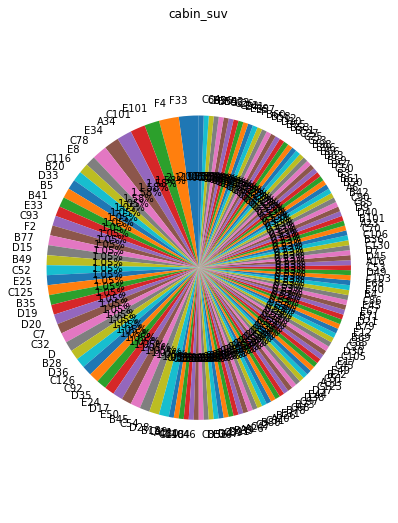

In [50]:
cabin_suv_count = tit_suv['cabin'].value_counts()
cabin_suv_index = cabin_suv_count.index
print(cabin_suv_count.index)

# 處理坐超過一隻船的資料
for i in cabin_suv_index:
    split_i = i.split(' ')

    if len(split_i)>1:
        for si in split_i:
            if si in cabin_suv_index:
                cabin_suv_count[si] += cabin_suv_count[i]
            else: 
                cabin_suv_count[si] = 1
        cabin_suv_count = cabin_suv_count.drop([i])

cabin_suv_index = cabin_suv_count.index
print(cabin_suv_count.index)
pie_plot(cabin_suv_index, cabin_suv_count, 'cabin_suv')


Index(['C22 C26', 'E46', 'C23 C25 C27', 'D', 'C124', 'D26', 'F2', 'C6',
       'C55 C57', 'F E46', 'C85', 'D22', 'B69', 'C118', 'C62 C64',
       'B51 B53 B55', 'C46', 'D21', 'B22', 'B71', 'B86', 'C2', 'C83', 'E52',
       'A29', 'B11', 'A24', 'C132', 'D43', 'D30', 'B37', 'B38', 'C39', 'E31',
       'F', 'C78', 'C31', 'D50', 'A5', 'B30', 'E67', 'A19', 'B58 B60', 'A36',
       'C86', 'E38', 'B24', 'A10', 'T', 'A18', 'B82 B84', 'D34', 'C30', 'C123',
       'E60', 'C89', 'C111', 'C106', 'F G63', 'C65', 'E58', 'A7',
       'B57 B59 B63 B66', 'C87', 'B78', 'D6', 'E63', 'B94', 'A14', 'E77',
       'A32', 'C49', 'C95', 'B19', 'D37', 'C128', 'C82', 'C80', 'D46', 'C110',
       'B102', 'E44', 'C91', 'D48', 'C68', 'B10', 'A21'],
      dtype='object')
Index(['E46', 'D', 'C124', 'D26', 'F2', 'C6', 'C85', 'D22', 'B69', 'C118',
       'C46', 'D21', 'B22', 'B71', 'B86', 'C2', 'C83', 'E52', 'A29', 'B11',
       'A24', 'C132', 'D43', 'D30', 'B37', 'B38', 'C39', 'E31', 'F', 'C78',
       'C31', 'D50', '

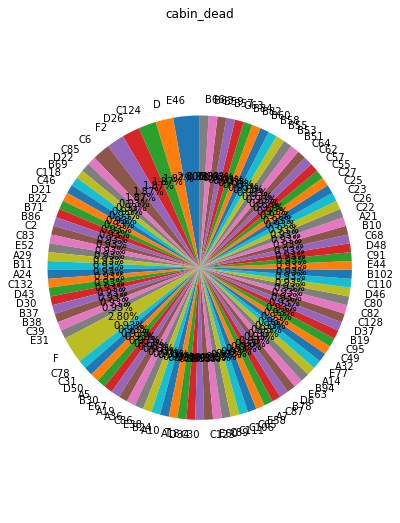

In [51]:
cabin_dead_count = tit_dead['cabin'].value_counts()
cabin_dead_index = cabin_dead_count.index
print(cabin_dead_count.index)

# 處理坐超過一隻船的資料
for i in cabin_dead_index:
    split_i = i.split(' ')

    if len(split_i)>1:
        for si in split_i:
            if si in cabin_dead_index:
                cabin_dead_count[si] += cabin_dead_count[i]
            else: 
                cabin_dead_count[si] = 1
        cabin_dead_count = cabin_dead_count.drop([i])

cabin_dead_index = cabin_dead_count.index
print(cabin_dead_count.index)
pie_plot(cabin_dead_index, cabin_dead_count, 'cabin_dead')


suvival rate:


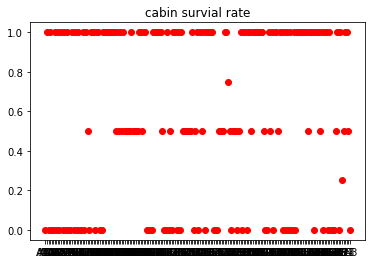

In [52]:
cdi = cabin_dead_index
for csi in (cabin_suv_index):
    if not csi in cdi:
        cabin_dead_count[csi] = 0

csi = cabin_suv_count.index
for cdi in (cabin_dead_count.index):
    if not cdi in csi:
        cabin_suv_count[cdi] = 0

print('suvival rate:')
cabin_suv_rate = cabin_suv_count / (cabin_dead_count + cabin_suv_count)
x = np.arange(len(cabin_suv_rate.index))
plt.xticks(x, cabin_suv_rate.index)
plt.plot(x, cabin_suv_rate, 'ro')
plt.title('cabin survial rate')
plt.show()

In [53]:
# if nan, we suppose he/she would have 50 percent to survive. 
def cable2num(x):
    if(str(x) != 'nan' and str(x)!='NaN'):
        x = x.split(' ')
        avg = []
        for c in x:
            avg.append(cabin_suv_rate[c])
        return np.array(avg).mean()
    
    return 0.5

In [54]:
tit['cabin_num'] = tit['cabin'].apply(cable2num)

In [55]:
tit

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,home,boat_num,home_num,cabin_num
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,"St Louis, MO",MO,1.000000,1.000000,1.000
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",ON,1.000000,0.157895,0.500
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",ON,0.400000,0.157895,0.500
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",ON,0.400000,0.157895,0.500
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",ON,0.400000,0.157895,0.500
5,1.0,1.0,male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,"New York, NY",NY,1.000000,0.596386,1.000
6,1.0,1.0,female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,"Hudson, NY",NY,1.000000,0.596386,1.000
7,1.0,0.0,male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,"Belfast, NI",NI,0.400000,0.000000,0.000
8,1.0,1.0,female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,"Bayside, Queens, NY",NY,0.944444,0.596386,1.000
9,1.0,0.0,male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,"Montevideo, Uruguay",Uruguay,0.400000,0.000000,0.500


# 

In [56]:
def embark2n(e):
    if e == 'S':
        return 0
    elif e == 'C':
        return 1
    else:
        return 2
    
tit['sex_n'] = tit['sex'].apply(lambda x: 0 if x =='male' else 1)
tit['embarked_n'] = tit['embarked'].apply(embark2n)


In [57]:
age_average = tit['age'].mean()
tit['age'] = tit['age'].apply(lambda x: age_average if (x == float('nan') or str(x)=='NaN' or str(x)=='nan') else x)

In [58]:
tit

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,home,boat_num,home_num,cabin_num,sex_n,embarked_n
0,1.0,1.0,female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,"St Louis, MO",MO,1.000000,1.000000,1.000,1,0
1,1.0,1.0,male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",ON,1.000000,0.157895,0.500,0,0
2,1.0,0.0,female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",ON,0.400000,0.157895,0.500,1,0
3,1.0,0.0,male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",ON,0.400000,0.157895,0.500,0,0
4,1.0,0.0,female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",ON,0.400000,0.157895,0.500,1,0
5,1.0,1.0,male,48.000000,0.0,0.0,19952,26.5500,E12,S,3,"New York, NY",NY,1.000000,0.596386,1.000,0,0
6,1.0,1.0,female,63.000000,1.0,0.0,13502,77.9583,D7,S,10,"Hudson, NY",NY,1.000000,0.596386,1.000,1,0
7,1.0,0.0,male,39.000000,0.0,0.0,112050,0.0000,A36,S,NaN,"Belfast, NI",NI,0.400000,0.000000,0.000,0,0
8,1.0,1.0,female,53.000000,2.0,0.0,11769,51.4792,C101,S,D,"Bayside, Queens, NY",NY,0.944444,0.596386,1.000,1,0
9,1.0,0.0,male,71.000000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,"Montevideo, Uruguay",Uruguay,0.400000,0.000000,0.500,0,1


# drop col

In [59]:
drop_col = ['sex', 'ticket', 'cabin', 'boat', 'home.dest', 'home', 'embarked']
for dc in drop_col:
    tit = tit.drop(dc, axis=1)

In [60]:
tit

,pclass,survived,age,sibsp,parch,fare,boat_num,home_num,cabin_num,sex_n,embarked_n
0,1.0,1.0,29.000000,0.0,0.0,211.3375,1.000000,1.000000,1.000,1,0
1,1.0,1.0,0.916700,1.0,2.0,151.5500,1.000000,0.157895,0.500,0,0
2,1.0,0.0,2.000000,1.0,2.0,151.5500,0.400000,0.157895,0.500,1,0
3,1.0,0.0,30.000000,1.0,2.0,151.5500,0.400000,0.157895,0.500,0,0
4,1.0,0.0,25.000000,1.0,2.0,151.5500,0.400000,0.157895,0.500,1,0
5,1.0,1.0,48.000000,0.0,0.0,26.5500,1.000000,0.596386,1.000,0,0
6,1.0,1.0,63.000000,1.0,0.0,77.9583,1.000000,0.596386,1.000,1,0
7,1.0,0.0,39.000000,0.0,0.0,0.0000,0.400000,0.000000,0.000,0,0
8,1.0,1.0,53.000000,2.0,0.0,51.4792,0.944444,0.596386,1.000,1,0
9,1.0,0.0,71.000000,0.0,0.0,49.5042,0.400000,0.000000,0.500,0,1


In [61]:
tit['child'] = tit.apply(lambda row: 1 if row['age'] < 15 else 0, axis=1)

In [62]:
tit

,pclass,survived,age,sibsp,parch,fare,boat_num,home_num,cabin_num,sex_n,embarked_n,child
0,1.0,1.0,29.000000,0.0,0.0,211.3375,1.000000,1.000000,1.000,1,0,0
1,1.0,1.0,0.916700,1.0,2.0,151.5500,1.000000,0.157895,0.500,0,0,1
2,1.0,0.0,2.000000,1.0,2.0,151.5500,0.400000,0.157895,0.500,1,0,1
3,1.0,0.0,30.000000,1.0,2.0,151.5500,0.400000,0.157895,0.500,0,0,0
4,1.0,0.0,25.000000,1.0,2.0,151.5500,0.400000,0.157895,0.500,1,0,0
5,1.0,1.0,48.000000,0.0,0.0,26.5500,1.000000,0.596386,1.000,0,0,0
6,1.0,1.0,63.000000,1.0,0.0,77.9583,1.000000,0.596386,1.000,1,0,0
7,1.0,0.0,39.000000,0.0,0.0,0.0000,0.400000,0.000000,0.000,0,0,0
8,1.0,1.0,53.000000,2.0,0.0,51.4792,0.944444,0.596386,1.000,1,0,0
9,1.0,0.0,71.000000,0.0,0.0,49.5042,0.400000,0.000000,0.500,0,1,0


# Training

In [63]:
all_col = tit.columns
use_col = all_col.drop("survived")
X = tit[use_col].as_matrix()
y = tit['survived'].as_matrix()
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn import preprocessing
preprocessed_X = preprocessing.normalize(preprocessing.scale(X))
print(preprocessed_X.shape)

(1000, 11)


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preprocessed_X, y, test_size=0.33, random_state=42)

In [65]:
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train)
predict_y = clf.predict(X_test)
acc = (y_test == predict_y).mean()
print(acc)

0.972727272727
